<a href="https://colab.research.google.com/github/TAUforPython/discretesystem/blob/main/z_transform.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install control

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [22]:
import sympy
import control
import matplotlib.pyplot as plt
import numpy as np

In [44]:
K, T = sympy.symbols('K, T')

In [82]:
K = 1
T = 2
dt = 0.5

In [83]:
W = control.tf(K, [T, 1])

In [90]:
U = control.tf(1, [1, 1])
U

TransferFunction(array([1]), array([1, 1]))

In [91]:
Uz = U.sample(dt)
Uz

TransferFunction(array([0.39346934]), array([ 1.        , -0.60653066]), 0.5)

In [86]:
Wz = W.sample(dt)
Wz

TransferFunction(array([0.22119922]), array([ 1.        , -0.77880078]), 0.5)

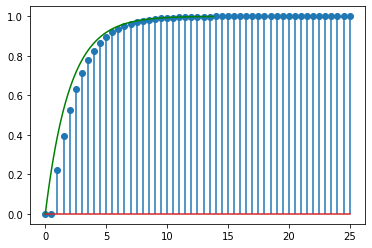

In [89]:
tz, yz = control.impulse_response(Wz * Uz, T_num = 10)

t, y = control.step_response(W)

plt.stem(tz, yz)

plt.plot(t, y, 'g')
plt.show()

In [82]:
from scipy import signal

name = 'Discrete Transfer Function'
num = [0.50]
den = [1.0, -2]
sys_z = signal.TransferFunction(num, den, dt = 0.1)
t,y = signal.dstep(sys_z)

In [84]:
w_z = signal.dlti([0.3], [1, -0.2], dt=0.1)
t,y = signal.dstep(w_z, n=25)

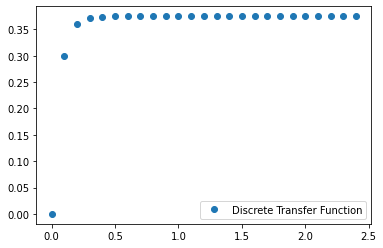

In [85]:
plt.figure(3)
plt.plot(t, np.squeeze(y), 'o', label=name)
plt.legend(loc='best')
plt.show()

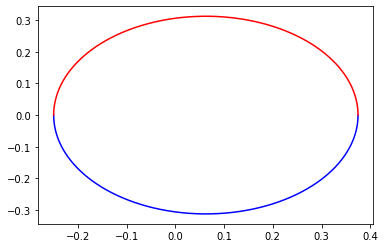

In [86]:
w, H = signal.dfreqresp(w_z)
plt.figure()
plt.plot(H.real, H.imag, "b")
plt.plot(H.real, -H.imag, "r")
plt.show()

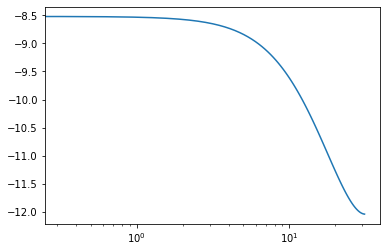

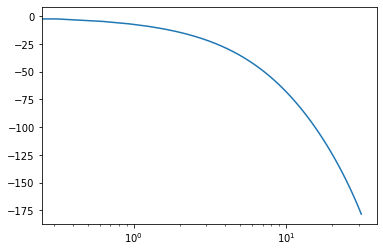

In [87]:
w, mag, phase = signal.dbode(w_z)
plt.figure()
plt.semilogx(w, mag)    # Bode magnitude plot mag = 20.0 * numpy.log10(abs(y))
plt.figure()
plt.semilogx(w, phase)  # Bode phase plot
plt.show()

<StemContainer object of 3 artists>

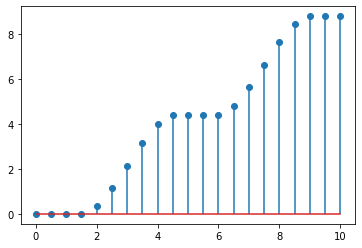

In [102]:
tf = ([1.0,], [1.0, -1.0], 0.5)
t_in = np.linspace(0,10,10)
u = np.asarray([0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0])
t_out, y = signal.dlsim(tf, u, t = t_in)
plt.stem(t_out, y)

In [101]:
print(t_in)

[ 0.          1.11111111  2.22222222  3.33333333  4.44444444  5.55555556
  6.66666667  7.77777778  8.88888889 10.        ]
